# Analysis for Insight Project

## Setup

In [1]:
# import modules
import pandas as pd
import numpy as np
import rootpath
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
import qgrid
import matplotlib.pyplot as plt

# Set root path for project
path = rootpath.detect()

# Read in data
# Use list comprehension to read in all files
df = pd.read_csv(f"{path}/data/data_clean.csv", index_col=0).reset_index(drop=True)

In [ ]:
# Product type validation
df = pd.read_csv(f"{path}/data/data_clean_prodtype_valid.csv", index_col=0).reset_index(drop=True)

In [564]:
df[df['brand']=="SUNDAY RILEY"]

,product,brand,product_type,active,price,size,ratings,total_reviews,link,price_oz,0,1
243,Ceramic Slip Cleanser,SUNDAY RILEY,face wash,no_actives,35.0,5.00,3.2,33,https://www.ulta.com/ceramic-slip-cleanser?pro...,7.00,-14.211832,15.635860
295,Pink Drink Firming Resurfacing Essence,SUNDAY RILEY,toner,no_actives,48.0,6.75,5.0,2,https://www.ulta.com/pink-drink-firming-resurf...,7.11,-0.233837,-17.874914
865,Good Genes All-In-One Lactic Acid Treatment,SUNDAY RILEY,face serum,no_actives,85.0,1.00,4.1,104,https://www.ulta.com/good-genes-all-in-one-lac...,85.00,9.746774,-2.926974
866,A+ High-Dose Retinoid Serum,SUNDAY RILEY,face serum,no_actives,85.0,1.00,4.4,30,https://www.ulta.com/a-high-dose-retinoid-seru...,85.00,4.644239,-1.574981
867,C.E.O. 15% Vitamin C Brightening Serum,SUNDAY RILEY,face serum,no_actives,85.0,1.00,3.8,43,https://www.ulta.com/ceo-15-vitamin-c-brighten...,85.00,13.503988,-11.133731


In [602]:
#df.head()
df.shape

(853, 20)

In [5]:
#features = df.copy().set_index('product')
# Old, before dimensionality reduction
features = df.copy().drop(['product_type','brand', 'price','size','ratings', 'active','vit_a',
                           'total_reviews','link','price_oz'],
                          axis=1).set_index('product')
#features.head(100)

## K-means++

#### Run K-means and determine number of clusters based on silhouette coef

In [173]:
# Set cluster arguments
kmeans_kwargs = {
        "init": "k-means++",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
        }

In [174]:
silhouette_coefficients = []

# Get silhouette coefficient for each cluster out of 50
for cluster in range(2, 20):
    kmeans = KMeans(n_clusters=cluster, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)

#### Plot silhouette coefficients vs. clusters

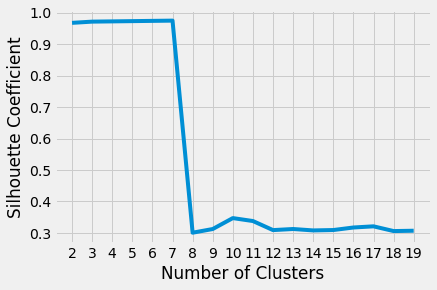

In [175]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# Add cluster labels to features


## DBSCAN

In [417]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [435]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)

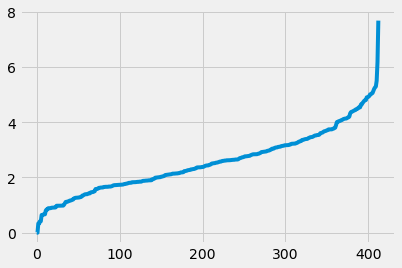

In [436]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [437]:
dbsc = DBSCAN(eps = 5, min_samples = 5).fit(features)
labels = dbsc.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(features, labels))


Estimated number of clusters: 1
Estimated number of noise points: 13
Silhouette Coefficient: 0.335


## Hierarchical/Agglomerative clustering

In [607]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Plot clustering results

# for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
#     model = AgglomerativeClustering(n_clusters=n_clusters,
#                                     linkage="average", affinity=metric)
#     model.fit(features)
#     plt.figure()
#     plt.axes([0, 0, 1, 1])
#     for l, c in zip(np.arange(model.n_clusters), 'rgbk'):
#         plt.plot(features[model.labels_ == l].T, c=c, alpha=.5)
#     plt.axis('tight')
#     plt.axis('off')
#     plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)


# plt.show()

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_hc =cluster.fit_predict(features)

#plt.scatter(features[:,1],features[:,2], c=cluster.labels_, cmap='rainbow')
# plt.scatter(features[y_hc ==0,0], features[y_hc == 0,1], s=100, c='red')
# plt.scatter(features[y_hc==1,0], features[y_hc == 1,1], s=100, c='black')
# plt.scatter(features[y_hc ==2,0], features[y_hc == 2,1], s=100, c='blue')
# plt.scatter(features[y_hc ==3,0], features[y_hc == 3,1], s=100, c='cyan')

In [584]:
features['cluster_labels'] = y_hc

In [585]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,cluster_labels
product,,,,,,,,,,,,,,,,,,,,,
The Microdelivery Exfoliating Facial Wash,1.225257,-0.831471,1.085914,0.199215,0.165847,-0.155683,0.247914,-0.088967,0.128975,-0.095547,...,0.018721,0.002497,-0.000112,0.035511,0.016232,0.056432,-0.024071,-0.001694,0.077221,0
AHA/BHA Exfoliating Cleanser,1.809298,-1.060433,0.882881,0.055500,0.234946,0.353983,-0.181930,0.219278,-0.083361,0.131203,...,0.026904,-0.050614,-0.131670,-0.038460,-0.002883,0.127456,-0.034768,0.034917,-0.037506,0
Hydrating Facial Cleanser,1.818391,-0.935320,0.792429,-0.170304,0.228655,-0.111074,-0.175043,-0.202005,-0.271360,0.301803,...,-0.209259,0.003113,-0.134940,0.051685,0.112461,0.000606,-0.011100,0.003331,0.005446,1
Anti-Aging Cleansing Gel,1.826982,-1.030466,0.869849,-0.058911,0.029676,0.357792,-0.382368,0.322961,-0.053760,-0.038201,...,-0.023535,0.036525,-0.075986,-0.044725,0.060956,-0.112853,0.073869,0.067343,-0.017364,0
Essential-C Cleanser,2.232532,-0.818987,0.772971,0.280153,0.337319,0.206010,-0.421622,0.500059,0.022538,-0.099224,...,0.192014,-0.030955,-0.227304,0.010332,-0.115268,-0.053123,-0.252086,-0.080943,-0.094681,0


In [608]:
plt.figure(figsize=(10, 7))  
plt.scatter(features['0'], features['1'], c=features['cluster_labels']) 

KeyError: 'cluster_labels'

<Figure size 720x504 with 0 Axes>

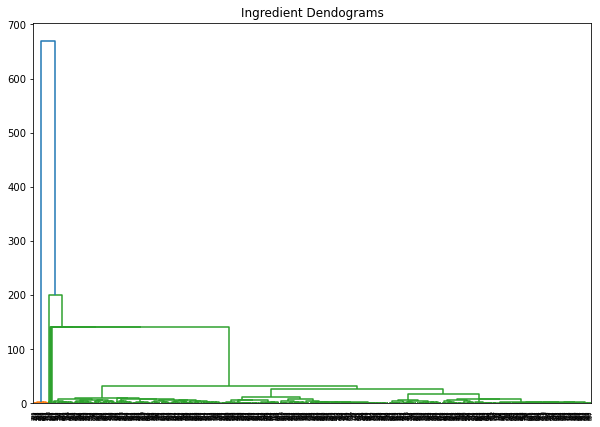

In [170]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Ingredient Dendograms")
dend = shc.dendrogram(shc.linkage(features, method='ward'))

## Gaussian Mixture models

In [171]:
from sklearn.mixture import GaussianMixture as GMM
#from sklearn.mixture import GMM
gmm = GMM(n_components=4).fit(features)
labels = gmm.predict(features)

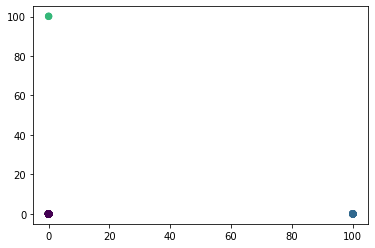

In [172]:
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=labels, s=40, cmap='viridis')

Text(0.5, 0, 'n_components')

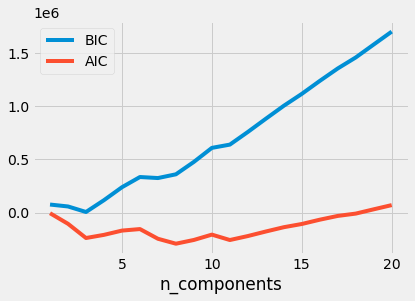

In [456]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(features)
          for n in n_components]

plt.plot(n_components, [m.bic(features) for m in models], label='BIC')
plt.plot(n_components, [m.aic(features) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [ ]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(features)
          for n in n_components]

plt.plot(n_components, [m.bic(features) for m in models], label='BIC')
plt.plot(n_components, [m.aic(features) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

## Pearson correlation

In [459]:
from sklearn.metrics import pairwise_distances

In [465]:
res_pearson = pairwise_distances(features.loc['Gentle Skin Cleanser',:].to_frame().transpose(), features,
                             metric='correlation') #[0:1] .loc["Essential-C Cleanser",:]
res_pearson

array([[0.6659717 , 0.65244956, 0.65833056, 0.64335864, 0.56099857,
        0.4287003 , 0.64115638, 0.65178082, 0.75585038, 0.7784969 ,
        0.37403556, 0.51420108, 0.35650727, 0.6124025 , 0.34853841,
        0.6836847 , 0.72785581, 0.87135438, 0.65260959, 0.65107936,
        0.60936829, 0.71738867, 0.67516719, 0.30237294, 0.7367131 ,
        0.5757427 , 0.61580584, 0.4609563 , 0.43872098, 0.88477554,
        0.58673214, 0.75242958, 0.67046645, 0.42054256, 0.75551712,
        0.83280832, 0.47495109, 0.61112765, 0.65054406, 0.73940975,
        0.7391732 , 0.75976675, 0.3984938 , 0.71547664, 0.68477574,
        0.60670738, 0.71578729, 0.49856663, 0.5815316 , 0.61508239,
        0.66406859, 0.65306131, 0.8609149 , 0.61111591, 0.75656364,
        0.66619389, 0.70578902, 0.71064032, 0.53261339, 0.7726461 ,
        0.27510447, 0.7075833 , 0.61365785, 0.64829463, 0.65780688,
        0.7075833 , 0.53212903, 0.74474819, 0.56340711, 0.55120436,
        0.61752173, 0.66328742, 0.68067665, 0.51

In [125]:
res_pearson = res_pearson.reshape(-1)
res_pearson = pd.DataFrame(res_pearson)
res_sim=df[['product','brand','product_type','price','size','ratings',
            'total_reviews','link','price_oz']].copy()
res_sim['similarity']=res_pearson[[0]]
# Round similarity metric
#res_sim['similarity']=round(res_sim['similarity'],2)
# Maybe don't round so you don't have to deal with ties?
#indexNames = res_sim[res_sim['product']=='Essential-C Cleanser'].index
#res_sim.drop(indexNames, inplace=True)
# Sort from top similarity metrics and ignoring self, so starting at 1, not zero
test = res_sim.nlargest(10, 'similarity')[1:10]
#res_sim.head()
# Select top match
test#[:1]

NameError: name 'res_pearson' is not defined

## Euclidean similarity

In [467]:
from sklearn.metrics import pairwise_distances
import heapq as hq

In [479]:
res_euc = pairwise_distances(features.loc['Gentle Skin Cleanser',:].to_frame().transpose(), features,
                             metric='euclidean') #[0:1] .loc["Essential-C Cleanser",:]
res_euc

array([[2.51678287, 2.33142432, 2.42849237, 2.3516415 , 2.74855314,
        1.95716933, 2.74452158, 2.89868572, 3.9829232 , 4.29047748,
        1.73297626, 2.42100615, 1.75963736, 2.19047426, 1.84817541,
        3.14575898, 3.51311736, 3.95159575, 2.37246507, 2.36048906,
        2.52256884, 3.45346666, 2.50148726, 1.64919185, 3.63089822,
        2.30893004, 2.65989352, 2.06113448, 1.94171032, 3.97566301,
        2.37263984, 3.82783308, 2.97006306, 1.89642226, 3.99874796,
        3.21055362, 2.4302471 , 2.57463623, 2.29409136, 3.89521447,
        2.39991795, 4.0063986 , 1.82504003, 3.36528216, 3.10630097,
        2.23136259, 3.36952555, 2.29178832, 3.19704216, 2.63099639,
        4.07027635, 3.17384605, 3.65512622, 2.56129209, 3.96560206,
        2.62396166, 4.76051565, 3.34166219, 2.82192039, 4.17852233,
        1.50150605, 3.3618171 , 2.56968273, 2.35973142, 3.7541872 ,
        3.3618171 , 2.15081486, 3.78289062, 2.31771648, 2.93331729,
        2.79883039, 2.93085612, 3.05639757, 2.68

In [480]:
res_euc = res_euc.reshape(-1)
res_euc = pd.DataFrame(res_euc)
res_sim=df[['product','brand','product_type','price','size','ratings',
            'total_reviews','link','price_oz']].copy()
res_sim['similarity']=res_euc[[0]]
# Round similarity metric
#res_sim['similarity']=round(res_sim['similarity'],2)
# Maybe don't round so you don't have to deal with ties?
#indexNames = res_sim[res_sim['product']=='Essential-C Cleanser'].index
#res_sim.drop(indexNames, inplace=True)
# Sort from top similarity metrics and ignoring self, so starting at 1, not zero
test = res_sim.nsmallest(10, 'similarity')[1:10]
#res_sim.head()
# Select top match
test#[:1]

,product,brand,product_type,price,size,ratings,total_reviews,link,price_oz,similarity
60,Vital Vita 12 Jelly Cleanser,TONYMOLY,face wash,18.00,5.0,4.2,15.0,https://www.ulta.com/vital-vita-12-jelly-clean...,3.60,1.501506
111,Foaming Facial Wash,Curél,face wash,20.00,5.0,4.6,240.0,https://www.ulta.com/foaming-facial-wash?produ...,4.00,1.636158
23,Orange Cleansing Soap,Mario Badescu,face wash,12.00,8.0,4.0,159.0,https://www.ulta.com/orange-cleansing-soap?pro...,1.50,1.649192
87,SkinActive Micellar Cleansing Water All-in-1 C...,Garnier,face wash,4.99,3.3,4.3,1726.0,https://www.ulta.com/skinactive-micellar-clean...,1.51,1.705777
99,AHA/BHA Acne Clearing Gel,Peter Thomas Roth,face wash,54.00,3.4,4.3,77.0,https://www.ulta.com/ahabha-acne-clearing-gel?...,15.88,1.726108
10,SkinActive Micellar Cleansing Water with Rose ...,Garnier,face wash,8.99,13.5,4.7,679.0,https://www.ulta.com/skinactive-micellar-clean...,0.67,1.732976
12,Oil-Free Acne Wash Pink Grapefruit Facial Clea...,Neutrogena,face wash,9.99,6.0,4.0,2646.0,https://www.ulta.com/oil-free-acne-wash-pink-g...,1.66,1.759637
42,All Bright Cleansing Foam Wash,Botanics,face wash,6.99,5.0,4.2,218.0,https://www.ulta.com/all-bright-cleansing-foam...,1.40,1.825040
14,Chamomile Cleansing Lotion,Mario Badescu,face wash,15.00,8.0,3.9,13.0,https://www.ulta.com/chamomile-cleansing-lotio...,1.88,1.848175


## Cosine similarity

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import heapq as hq

In [150]:
features.loc['Good Genes All-In-One Lactic Acid Treatment',:].to_frame().transpose()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Good Genes All-In-One Lactic Acid Treatment,0.00004,0.010181,0.007252,-0.003392,0.000209,0.000484,0.588688,0.143943,-0.69762,-0.755284,...,-0.265798,0.060481,-0.257833,-0.030133,0.167019,-0.003906,0.109727,0.09028,0.03137,-0.071883


In [116]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
product,,,,,,,,,,,,,,,,,,,,,
The Microdelivery Exfoliating Facial Wash,0.005109,0.026388,0.019139,0.015737,0.011804,0.040523,0.047470,-0.000057,1.208755,-0.780488,...,-0.085563,-0.110450,-0.023823,0.084598,-0.003582,0.005568,0.159749,0.063010,-0.093492,0.007545
AHA/BHA Exfoliating Cleanser,0.014445,0.036547,0.032800,0.021612,0.022671,0.064152,0.055410,0.008444,1.785970,-1.018542,...,-0.216673,0.048243,0.148549,-0.182165,-0.094474,-0.170695,-0.110881,0.030453,-0.014132,-0.133672
Hydrating Facial Cleanser,0.014445,0.033173,0.034367,0.024020,0.022706,0.062177,0.054629,0.008891,1.798739,-0.902756,...,-0.087101,0.180479,0.144983,0.082328,-0.150458,0.048643,0.111913,0.125662,-0.007605,0.081093
Anti-Aging Cleansing Gel,0.014448,0.036702,0.033722,0.026482,0.022708,0.063742,0.052493,0.010148,1.804293,-0.991571,...,-0.220594,0.069816,-0.105584,0.074536,0.268280,-0.076265,-0.089639,0.119799,0.003991,-0.094210
Essential-C Cleanser,0.016270,0.039849,0.048622,0.035795,0.028372,0.100810,0.055377,0.008740,2.257349,-0.819252,...,-0.285106,0.073398,0.197005,0.022470,0.183490,0.038499,-0.150709,0.134890,-0.255228,-0.114078


In [158]:
df

,product,brand,product_type,active,price,size,ratings,total_reviews,link,price_oz,...,41,42,43,44,45,46,47,48,49,vit_a
0,The Microdelivery Exfoliating Facial Wash,Philosophy,face wash,no_actives,29.00,8.00,4.5,812,https://www.ulta.com/microdelivery-exfoliating...,3.62,...,0.025182,-0.027935,0.048542,0.168888,-0.064342,-0.029877,0.023201,-0.050958,-0.074378,0
1,AHA/BHA Exfoliating Cleanser,Murad,face wash,no_actives,40.00,6.75,4.6,267,https://www.ulta.com/ahabha-exfoliating-cleans...,5.93,...,0.145476,0.023719,0.078348,-0.187813,0.074210,0.173912,0.006308,0.105570,0.038466,0
2,Hydrating Facial Cleanser,CeraVe,face wash,no_actives,13.49,8.00,4.2,700,https://www.ulta.com/hydrating-facial-cleanser...,1.69,...,0.134936,-0.012049,0.238888,-0.189581,-0.185041,-0.154400,0.117378,-0.028735,0.241734,1
3,Anti-Aging Cleansing Gel,Peter Thomas Roth,face wash,no_actives,39.00,8.50,4.5,330,https://www.ulta.com/anti-aging-cleansing-gel?...,4.59,...,0.125236,0.269273,0.142161,-0.001903,0.021177,0.108418,-0.010157,-0.007142,0.047504,1
4,Essential-C Cleanser,Murad,face wash,no_actives,40.00,6.75,4.6,272,https://www.ulta.com/essential-c-cleanser?prod...,5.93,...,0.097427,0.082206,0.236783,-0.321999,-0.282681,0.055476,-0.209665,0.014304,-0.161765,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Antiplaque & Whitening Toothpaste Peppermint,Tom's of Maine,toothpaste,no_actives,4.69,5.50,4.7,40,https://www.walgreens.com/store/c/tom's-of-mai...,0.85,...,0.236100,0.034250,-0.077789,0.038679,0.254285,0.001381,0.121588,0.084932,0.046293,0
849,Anticavity Fluoride Toothpaste with Whitening ...,Colgate MaxFresh,toothpaste,no_actives,3.49,6.00,4.7,71,https://www.walgreens.com/store/c/colgate-maxf...,0.58,...,0.288956,0.129749,-0.478267,0.129268,0.412880,0.080882,0.295295,-0.081433,0.013384,0
850,Good Genes All-In-One Lactic Acid Treatment,SUNDAY RILEY,face serum,no_actives,85.00,1.00,4.1,104,https://www.ulta.com/good-genes-all-in-one-lac...,85.00,...,0.060481,-0.257833,-0.030133,0.167019,-0.003906,0.109727,0.090280,0.031370,-0.071883,0
851,A+ High-Dose Retinoid Serum,SUNDAY RILEY,face serum,no_actives,85.00,1.00,4.4,30,https://www.ulta.com/a-high-dose-retinoid-seru...,85.00,...,0.255389,-0.131660,-0.290169,0.536320,0.232750,0.144092,0.310105,0.207430,0.222960,0


In [177]:
#features = df.copy().set_index('product')
# Old, before dimensionality reduction
df_temp = df.copy()

# If active ingredient, paste to other column for text parsing
# - Make two columns, one for ingredient name, the other for the value
df_temp2 = df_temp.loc[df_temp['vit_a']==1]

features = df_temp2.copy().drop(['product_type','brand', 'price','size','ratings', 'active','vit_a',
                           'total_reviews','link','price_oz'],
                          axis=1).set_index('product')
features.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
product,,,,,,,,,,,,,,,,,,,,
+Retinol Vita C Power Serum Firming + Brightening Treatment,0.010543,0.021712,0.041526,-0.007964,0.008131,0.013705,1.546059,-0.784426,-0.927136,-0.296286,-0.180750,0.662652,0.342097,-0.099919,0.078950,-0.121042,-0.036390,0.165403,-0.132104,0.208711
+Retinol Vitamin C Moisturizer,0.024541,0.059035,0.094709,-0.003740,0.022303,0.016154,2.443386,1.480570,-0.303838,-0.300337,-0.936772,0.819595,0.433277,-0.119486,0.340504,-0.178119,-0.172269,0.769385,-0.198510,0.076714
A+ High-Dose Retinoid Serum,0.001380,0.016536,0.032617,-0.017725,-0.001816,0.005483,1.018974,-0.009259,-0.763412,0.151360,-0.298005,0.510818,0.812463,-0.803347,0.317402,-1.027187,-0.836786,0.351216,-0.172856,0.120300
Advanced Retinol Concentrated Serum,0.010536,0.019424,0.046780,-0.011827,0.007132,0.013390,1.464425,-0.902326,-0.900302,-0.257268,0.005005,0.827391,0.157290,-0.332639,0.045609,0.100997,-0.141796,0.081649,0.025572,0.198571
Age Reform Hydro-Dynamic Ultimate Moisture,0.024552,0.062415,0.111476,-0.014952,0.020147,0.013803,2.560652,1.688340,-0.363892,-0.287507,-0.389787,1.680109,0.292020,0.345205,1.267809,0.281602,0.264439,-0.490418,-0.015942,-0.656140
Age Reverse Day Repair SPF 30 + Retinol Antiaging Moisturizer,0.024514,0.038694,0.089807,-0.009499,0.022937,0.022772,2.251645,-0.012314,-0.485396,-0.665636,-0.189895,0.892348,0.530705,-0.207842,-0.772227,0.453272,0.414331,-0.084693,0.044170,0.004579
Age Reverse Night Lift Antiaging Moisturizer,0.010541,0.020601,0.047335,-0.011924,0.007258,0.014212,1.514145,-0.773622,-0.867968,-0.335179,-0.295299,0.916815,0.165021,0.168435,-0.316292,0.009947,0.203916,0.010085,-0.052283,0.079613
Age Smart Multivitamin Power Serum,0.010532,0.019187,0.043343,-0.009744,0.007486,0.013431,1.409900,-0.914763,-0.861463,-0.334756,-0.133432,0.691261,0.151414,-0.235097,-0.129866,0.070495,-0.104770,0.171589,-0.086445,0.064173
All-Over Wash,0.014491,0.026168,0.070238,-0.005014,0.015964,0.035243,2.035282,-0.553286,0.849459,-0.235109,-0.284662,1.002260,-0.132088,-0.055019,0.295183,-0.028022,0.054240,0.181846,-0.272509,0.180605


In [162]:
features.loc['A+ High-Dose Retinoid Serum',:].to_frame().transpose()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
A+ High-Dose Retinoid Serum,0.001346,0.00624,0.020541,-0.013115,-0.001718,0.000246,0.639218,-0.048714,-0.79394,-0.43607,...,-0.456678,0.255389,-0.13166,-0.290169,0.53632,0.23275,0.144092,0.310105,0.20743,0.22296


In [25]:
# Calculate cosine similarity for feature 1 
res_cosine = cosine_similarity(features.loc['Aveeno Positively Radiant Brightening & Exfoliating Face Scrub',:].to_frame().transpose(), features) #[0:1] .loc["Essential-C Cleanser",:]
res_cosine = res_cosine.reshape(-1)
res_cosine = pd.DataFrame(res_cosine)
res_sim=df[['product','brand','product_type','price','size','ratings', 'active','vit_a',
            'total_reviews','link','price_oz']].copy()
res_sim['similarity']=res_cosine[[0]]
# Round similarity metric
#res_sim['similarity']=round(res_sim['similarity'],2)
# Maybe don't round so you don't have to deal with ties?
#indexNames = res_sim[res_sim['product']=='Essential-C Cleanser'].index
#res_sim.drop(indexNames, inplace=True)
# Sort from top similarity metrics and ignoring self, so starting at 1, not zero
test = res_sim.nlargest(5, 'similarity')[1:5]
#res_sim.head()
# Select top match
test[:10]
#Good Genes All-In-One Lactic Acid Treatment
#A+ High-Dose Retinoid Serum
# Generic vs similar validation
# Cetaphil Daily Facial Cleanser
# Cetaphil Fragrance Free Moisturizing Cream : 0.959282
# Banana Boat Ultra Sport Sunscreen Lotion, Broad Spectum SPF 30 : 0.999971
# St. Ives Fresh Skin Face Scrub, Apricot : 0.999748
# Clean & Clear Essentials Deep Cleaning Toner Sensitive Skin : 0.999994
# Aveeno Positively Radiant Brightening & Exfoliating Face Scrub : 0.990599

#test[test['vit_a']==1]

,product,brand,product_type,price,size,ratings,active,vit_a,total_reviews,link,price_oz,similarity
106,Beauty 360 Illuminating Facial Scrub,Beauty 360,face wash,7.49,5.0,4.4,no_actives,0,8,https://www.cvs.com/shop/beauty-360-illuminati...,1.50,0.990599
154,Cetaphil Daily Facial Cleanser,Cetaphil,face wash,6.33,8.0,4.7,no_actives,0,644,https://www.amazon.com/Cetaphil-Daily-Facial-C...,0.79,0.987227
72,"Amazon Brand - Solimo Daily Facial Cleanser, N...",Solimo,face wash,4.44,8.0,4.3,no_actives,0,867,https://www.amazon.com/Amazon-Brand-Solimo-Fac...,0.56,0.982133
305,Extreme Whitening Control with Baking Soda & P...,Arm & Hammer Advance White,toothpaste,3.09,6.0,4.5,no_actives,0,141,https://www.walgreens.com/store/c/arm-%26-hamm...,0.52,0.920256


In [554]:
res_sim.columns

Index(['product', 'brand', 'product_type', 'price', 'size', 'ratings',
       'active', 'total_reviews', 'link', 'price_oz', 'similarity'],
      dtype='object')

In [32]:
res_cosine = cosine_similarity(features.loc['A+ High-Dose Retinoid Serum',:].to_frame().transpose(), features) #[0:1] .loc["Essential-C Cleanser",:]
res_cosine = res_cosine.reshape(-1)
res_cosine = pd.DataFrame(res_cosine)
res_sim=df[['product','brand','product_type','price','size','ratings', 'active',
            'total_reviews','link','price_oz']].copy()
res_sim['similarity']=res_cosine[[0]]
# Round similarity metric
#res_sim['similarity']=round(res_sim['similarity'],2)
# Maybe don't round so you don't have to deal with ties?

# Sort from top similarity metrics and ignoring self, so starting at 1, not zero
test = res_sim.nlargest(6, 'similarity')[0:6]
#res_sim.head()
# Select top match
test['product_type']#.loc[test['product']=='A+ High-Dose Retinoid Serum',['product_type']]

18     face serum
632    face serum
387    face serum
138    face serum
645    face serum
372    face serum
Name: product_type, dtype: object

In [41]:
res_temp = np.where(test['product_type']==test.loc[test['product']=='A+ High-Dose Retinoid Serum',['product_type']].values[0], 1, 0)  

ValueError: ('Lengths must match to compare', (6,), (1,))

In [33]:
test

,product,brand,product_type,price,size,ratings,active,total_reviews,link,price_oz,similarity
18,A+ High-Dose Retinoid Serum,SUNDAY RILEY,face serum,85.00,1.0,4.4,no_actives,30,https://www.ulta.com/a-high-dose-retinoid-seru...,85.00,1.000000
632,Radically Rejuvenating Dual Phase Bakuchiol Serum,ACURE,face serum,19.99,0.6,4.3,no_actives,7,https://www.ulta.com/radically-rejuvenating-du...,33.32,0.843894
387,Honestly Pure Retinol Serum,Honest Beauty,face serum,28.00,1.0,4.5,no_actives,34,https://www.ulta.com/honestly-pure-retinol-ser...,28.00,0.843711
138,C.E.O. 15% Vitamin C Brightening Serum,SUNDAY RILEY,face serum,85.00,1.0,3.8,no_actives,43,https://www.ulta.com/ceo-15-vitamin-c-brighten...,85.00,0.831624
645,Rapid Wrinkle Repair Serum,Neutrogena,face serum,26.99,1.0,4.0,no_actives,294,https://www.ulta.com/rapid-wrinkle-repair-seru...,26.99,0.798791
372,Hello Radiance Illuminating Serum,Tula,face serum,68.00,1.7,4.5,no_actives,107,https://www.ulta.com/hello-radiance-illuminati...,40.00,0.772907


In [86]:

# tmp_prodtype = test.loc[test['product']==product,['product_type']].values[0]
# tmp_prodtype
#test['product'].values
for i,product in enumerate(test['product'].values):
    prod_name = test['product'].values[i]
    print(prod_name)
prod_name

A+ High-Dose Retinoid Serum
C.E.O. 15% Vitamin C Brightening Serum
Multi Correxion Revive + Glow Daily Serum
Quench Hydrating Face Serum
Peptight Tightening & Brightening Face Serum
Midnight Recovery Concentrate


'Midnight Recovery Concentrate'

In [89]:
test.loc[test['product']==prod_name,['product_type']].values[0]
#tmp_prodtype = test.loc[test['product']==prod_name,['product_type']].values[0]
#tmp_prodtype

array(['face serum'], dtype=object)

In [34]:
test['product_type'].isin(tmp_prodtype).sum()

6

In [78]:
cosine_similarity(features.loc[prod_name,:].to_frame().transpose(), features)

array([[ 7.94104093e-02,  3.53716222e-01,  4.12871702e-01,
         3.70933394e-01,  4.41839069e-01,  4.67051982e-01,
         4.04418691e-01,  4.53647735e-01,  4.02673602e-01,
         3.95732397e-01,  3.61079395e-01,  1.67131271e-01,
         4.32898611e-01,  1.28107825e-01,  4.13221269e-01,
         1.09390707e-01,  6.89718329e-02,  4.03762969e-01,
         3.64860483e-01,  9.21171130e-02,  3.82892202e-01,
         3.97003680e-01,  7.36613932e-03,  1.13943465e-01,
         5.19114246e-01,  1.63084185e-01,  5.08419316e-01,
         8.89989841e-02,  3.46721606e-01,  4.46964303e-02,
         4.07741993e-01,  4.16240459e-01,  3.94241278e-01,
         3.99210606e-01,  3.74027391e-01,  5.13957018e-01,
         3.88619629e-01,  5.08520399e-01,  3.88501737e-01,
         3.80172042e-01,  6.03015670e-02,  3.94832429e-01,
         3.81267024e-01, -5.84809358e-06,  4.14851264e-01,
         8.97283694e-02,  1.28626147e-01,  4.14797246e-01,
         3.98664538e-01,  1.14174594e-01,  1.39883980e-0

In [35]:
product = 'A+ High-Dose Retinoid Serum'
#test.loc[test['product']=='A+ High-Dose Retinoid Serum',['product_type']]
test.loc[test['product']==product,['product_type']].values[0]

array(['face serum'], dtype=object)

In [37]:
test.loc[test['prodtype_match_tot'],1]#.append(tmp_top_sim['product_type'].isin(tmp_prodtype).sum()-1)

KeyError: 'prodtype_match_tot'

In [45]:
# Create temp df for troubleshooting for loop
df_temp = df.copy()[:5]
df_temp

,product,brand,product_type,active,price,size,ratings,total_reviews,link,price_oz,...,11,12,13,14,15,16,17,18,19,vit_a
0,''Buffet'',The Ordinary,face serum,no_actives,14.80,1.0,4.4,333,https://www.ulta.com/buffet?productId=pimprod2...,14.80,...,-0.129916,0.126002,0.162188,-0.246412,0.017430,-0.325152,0.255324,-0.063510,-0.118330,0
1,''Buffet'' + Copper Peptides 1%,The Ordinary,face serum,no_actives,28.90,1.0,4.3,52,https://www.ulta.com/buffet-copper-peptides-1?...,28.90,...,-0.148335,0.117411,0.137886,-0.241574,-0.001409,-0.305912,0.250620,-0.068237,-0.123871,0
2,+Retinol Vita C Power Serum Firming + Brighten...,Kate Somerville,face serum,no_actives,98.00,1.0,4.3,47,https://www.ulta.com/retinol-vita-c-power-seru...,98.00,...,-0.404009,0.181768,-0.397968,0.094172,0.251226,0.178438,-0.211869,0.587289,0.380548,1
3,+Retinol Vitamin C Moisturizer,Kate Somerville,face moisturizer,no_actives,90.00,1.7,3.7,10,https://www.ulta.com/retinol-vitamin-c-moistur...,52.94,...,-0.670978,-0.556725,-0.595433,0.108214,0.542305,0.756320,-0.124922,0.818436,0.932956,1
4,1000 Roses Cleansing Foam,Andalou Naturals,face wash,no_actives,12.99,0.6,4.8,10,https://www.ulta.com/1000-roses-cleansing-foam...,21.65,...,-0.052668,-0.605225,-0.067271,0.372837,0.154673,-0.854062,0.401039,-0.344363,0.513854,0


In [ ]:
# Troubleshooting for loop

# df to store results
#res_sim_prodtype=df[['product','brand','product_type']].copy()

# add empty column for storing results
#res_sim_prodtype['prodtype_match_tot'] = np.nan

res_sim_prodtype = []
#prodtype_match_tot
#

# for each product in df, 
# 1. Get top 6 similiar products, including self
# 2. Count number of products, excluding self, that match input product type
# 3. Add result to df for each product
for i,product in enumerate(df['product']):
    # Get product name value
    prod_name = df['product'].values[i]
    # Calc cosine similarity for the product
    tmp_cosine = cosine_similarity(features.loc[prod_name,:].to_frame().transpose(), features)
    tmp_cosine = tmp_cosine.reshape(-1)
    tmp_cosine = pd.DataFrame(tmp_cosine)
    # Copy df for storing tmp similarity result
    tmp_sim=df[['product','brand','product_type','price','price_oz']].copy()
    # Add similarity to df
    tmp_sim['similarity']=tmp_cosine[[0]]
    # Sort from top similarity metrics and extract top 6, including self
    tmp_top_sim = tmp_sim.nlargest(6, 'similarity')[0:6]
    # Store result in res_sim_prodtype df outside for loop
    ## Store input product type in tmp_prodtype
    tmp_prodtype = tmp_top_sim.loc[tmp_top_sim['product']==prod_name,['product_type']].values[0]
    ## Check match between input prod type and prod_types in sim output and sum matches
    ## -1 to account for matching with self
    res_sim_prodtype.append(tmp_top_sim['product_type'].isin(tmp_prodtype).sum()-1)

In [43]:
## Calculate average product type accuracy

# df to store results
res_sim_prodtype=df[['product','brand','product_type']].copy()

# add empty column for storing results
#res_sim_prodtype['prodtype_match_tot'] = np.nan

res_sim_prodtype = []
#prodtype_match_tot
#

# for each product in df, 
# 1. Get top 6 similiar products, including self
# 2. Count number of products, excluding self, that match input product type
# 3. Add result to df for each product
for i,product in enumerate(df['product']):
    # Get product name value
    prod_name = df['product'].values[i]
    # Calc cosine similarity for the product
    tmp_cosine = cosine_similarity(features.loc[prod_name,:].to_frame().transpose(), features)
    tmp_cosine = tmp_cosine.reshape(-1)
    tmp_cosine = pd.DataFrame(tmp_cosine)
    # Copy df for storing tmp similarity result
    tmp_sim=df[['product','brand','product_type','price','price_oz']].copy()
    # Add similarity to df
    tmp_sim['similarity']=tmp_cosine[[0]]
    # Sort from top similarity metrics and extract top 6, including self
    tmp_top_sim = tmp_sim.nlargest(6, 'similarity')[0:6]
    # Store result in res_sim_prodtype df outside for loop
    ## Store input product type in tmp_prodtype
    tmp_prodtype = tmp_top_sim.loc[tmp_top_sim['product']==prod_name,['product_type']].values[0]
    ## Check match between input prod type and prod_types in sim output and sum matches
    ## -1 to account for matching with self
    res_sim_prodtype.append(tmp_top_sim['product_type'].isin(tmp_prodtype).sum()-1)
    
    #res_sim_prodtype.loc[res_sim_prodtype['prodtype_match_tot']].append(tmp_top_sim['product_type'].isin(tmp_prodtype).sum()-1)
    

IndexError: index 0 is out of bounds for axis 0 with size 0

In [358]:
top_sim = res_sim.nlargest(6, 'similarity')[1:6]
#best_sim_score = min(max(top_sim['similarity'] + min(top_sim['price_oz'])))
#best_sim_score
test=top_sim.iloc[0].to_frame().transpose()[['brand','product','price','price_oz','size','link']]

In [359]:
test

,brand,product,price,price_oz,size,link
111,Curél,Foaming Facial Wash,20,4,5,https://www.ulta.com/foaming-facial-wash?produ...


In [505]:
### TEST STREAMLIT AREA
prod_type = 'face wash'

In [511]:
df.columns

Index(['product', 'brand', 'product_type', 'active', 'price', 'size',
       'ratings', 'total_reviews', 'link', 'price_oz',
       ...
       '190', '191', '192', '193', '194', '195', '196', '197', '198', '199'],
      dtype='object', length=210)

In [521]:
df2 = df[df.product_type==(f'{prod_type}')]

In [523]:
df2.brand.unique()

array(['Philosophy', 'Murad', 'CeraVe', 'Peter Thomas Roth',
       'The Ordinary', 'PEACH & LILY', 'Tula', 'INDIE LEE', 'Dermalogica',
       'Banila Co', 'It Cosmetics', 'Garnier', 'Clinique',
       'The Body Shop', 'Origins', 'Mario Badescu', 'La Roche-Posay',
       'Proactiv', 'Cetaphil', 'Perricone MD', 'Clarins',
       'Kate Somerville', "Kiehl's Since 1851", 'boscia', 'Shiseido',
       'COSRX', 'Derma E', 'bareMinerals', 'Formula 10.0.6',
       'Skyn Iceland', 'Jack Black', 'Juice Beauty', 'ELEMIS',
       'Kopari Beauty', 'PÜR', 'Dermadoctor', 'Pacifica', 'Exuviance',
       'Neutrogena', 'Curél', 'Skinfood', 'Bliss', 'No7', 'My Clarins',
       'ULTA', 'YourGoodSkin', 'ARCONA', 'UpCircle', "L'Occitane",
       'Fifth & Root', 'DHC', 'Hey Honey', 'Botanics', 'Pixi',
       'Milk + Honey', 'Leaders', 'Ofra Cosmetics', 'Follain', 'Clarisma',
       'THANN', 'Yes to', 'ACURE', 'Peach Slices', 'Honest Beauty',
       'Estée Lauder', 'Bioré', 'Hanskin', 'e.l.f. Cosmetics',
    

In [370]:
tempdf = df.loc[df['product']==f'{product}']
df.loc[df['product']==f'{product}']

,product,brand,product_type,price,size,ratings,total_reviews,link,price_oz,0,...,190,191,192,193,194,195,196,197,198,199
111,Foaming Facial Wash,Curél,face wash,20.0,5.0,4.6,240.0,https://www.ulta.com/foaming-facial-wash?produ...,4.0,1.305882,...,0.230863,-0.072649,-0.010053,-0.149319,0.050311,0.018858,0.035698,0.076982,-0.042091,0.05028


In [387]:
price_diff = tempdf['price_oz']-output_rec['price_oz']

In [396]:
tempdf = df.loc[df['product']==f'{product}']
test.iloc[1]['price_oz']
#price_diff = tempdf['price_oz']-test['price_oz']
#price_diff=price_diff.astype('float')
#price_diff
#tempdf['price_oz']
#price_diff
#test=price_diff.values[0]
#test
#f"test price:{test}"

3.6

In [328]:
output_rec = top_sim.iloc[0].to_frame().transpose()[['product_type', 'brand','product','price','price_oz','size','link']]
output_rec

,product_type,brand,product,price,price_oz,size,link
111,face wash,Curél,Foaming Facial Wash,20,4,5,https://www.ulta.com/foaming-facial-wash?produ...


In [411]:
tempdf = df.loc[df['product']==f'{product}']
res_sim
#tempdf
price_diff = tempdf['price_oz']-output_rec['price_oz']
#price_diff
#res_sim['price_oz']
#price_diff
#tempdf['price_oz']#-res_sim['price_oz']
top_sim = res_sim.nlargest(6, 'similarity')[1:6]
output_rec = top_sim.iloc[1].to_frame().transpose()[['product_type', 'brand','product', 'similarity','price','price_oz','size','link']]
output_rec['similarity']=output_rec['similarity'].astype(float)
output_rec['similarity']=round(output_rec['similarity'],2)
#output_rec
#tempdf = df.loc[df['product']==f'{product}']
#tempdf
output_rec['similarity']

60    0.73
Name: similarity, dtype: float64

In [284]:
product_input=df.loc[df['product']==f'{product}']
product_input

,product,brand,product_type,price,size,ratings,total_reviews,link,price_oz,0,...,190,191,192,193,194,195,196,197,198,199
111,Foaming Facial Wash,Curél,face wash,20.0,5.0,4.6,240.0,https://www.ulta.com/foaming-facial-wash?produ...,4.0,1.305882,...,0.230863,-0.072649,-0.010053,-0.149319,0.050311,0.018858,0.035698,0.076982,-0.042091,0.05028


In [282]:
cosine_similarity(product_input) 

ValueError: could not convert string to float: 'Foaming Facial Wash'

In [259]:
top_sim[:1]

NameError: name 'top_sim' is not defined

In [245]:
(((0.881751+0.766394+0.629398)/3) + ((0.629398+0.526911+0.539059)/3) +
((0.881751+0.757364+0.526911)/3) + ((0.766394+0.757364+0.539059)/3))/4

0.6834795

In [219]:
test
#np.minimum(test['similarity'],test['price_oz'])
min(max(test.similarity),min(test.price_oz))

0.785614939701423

In [141]:
features.index
#features.loc["Essential-C Cleanser",:]  #"'Buffet' + Copper Peptides 1%"
features.loc["Essential-C Cleanser",:].to_frame().transpose()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
Essential-C Cleanser,1.692273,-0.334327,-0.1981,-0.721162,0.311682,0.403308,0.134368,0.140876,-0.073881,0.085826,...,-0.067952,0.092941,-0.085718,0.083519,-0.02647,0.095582,-0.092331,0.176955,-0.006216,-0.021925


In [157]:
features.loc["Essential-C Cleanser",:].to_frame().transpose()
#features.loc[0,["Essential-C Cleanser"]]

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
Essential-C Cleanser,1.692273,-0.334327,-0.1981,-0.721162,0.311682,0.403308,0.134368,0.140876,-0.073881,0.085826,...,-0.067952,0.092941,-0.085718,0.083519,-0.02647,0.095582,-0.092331,0.176955,-0.006216,-0.021925


In [191]:
#res_cosine
res_cosine.nlargest(6, 0)[1:6]

,0
66,0.883107
5,0.877325
42,0.873452
29,0.866865
16,0.865999


In [150]:
features.loc["Essential-C Cleanser":]

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
product,,,,,,,,,,,,,,,,,,,,,
Essential-C Cleanser,1.692273,-0.334327,-0.198100,-0.721162,0.311682,0.403308,0.134368,0.140876,-0.073881,0.085826,...,-0.067952,0.092941,-0.085718,0.083519,-0.026470,0.095582,-0.092331,0.176955,-0.006216,-0.021925
Squalane Cleanser,1.838453,-0.752250,-0.164121,-0.689460,-0.311128,0.151342,0.332328,-0.106218,0.363916,0.319669,...,0.212272,-0.010433,0.038155,0.093323,0.041337,0.168622,0.119676,0.056650,-0.019799,0.168964
Purity Made Simple One-Step Facial Cleanser,1.564310,-0.339959,-0.317187,-0.864637,0.188944,0.069568,-0.032678,0.206118,0.212718,0.168260,...,0.133295,-0.026537,0.041422,0.100734,-0.078355,-0.046946,-0.008473,-0.007212,0.088524,0.055125
Brightening Cleanser,1.248828,-0.344294,-0.385217,-0.995253,0.086369,0.310106,0.041395,0.068215,0.149334,-0.177795,...,0.065994,0.031752,0.022277,0.041208,0.012039,-0.063189,-0.020513,0.022545,0.022670,0.007932
Clearing Skin Wash,1.350051,-0.430794,-0.331308,-1.036320,0.214340,0.366983,0.067601,0.027319,0.002637,-0.181765,...,-0.051091,0.071525,-0.009760,0.095336,0.025304,-0.013245,0.066164,-0.105907,-0.008021,0.103390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eudermine Revitalizing Essence,1.837895,0.889976,0.714020,0.132062,0.201420,0.145071,-0.139853,0.036491,-0.158056,0.094124,...,0.136366,0.079923,-0.210101,-0.209674,0.192691,-0.182414,-0.020472,-0.107882,-0.063180,-0.123752
Clear Days Ahead Dark Spot Correcting Serum,2.132511,1.017764,0.791828,0.187813,-0.154457,-0.423460,-0.627530,0.031894,-0.299987,-0.205561,...,-0.197508,0.088492,-0.300584,0.207109,0.094458,-0.072442,0.022628,0.170735,-0.379839,-0.065045
Strawberry Face Milk,1.533950,0.854930,0.455310,-0.306063,-0.493976,-0.458818,0.303550,-0.352652,0.383301,-0.297705,...,-0.148259,0.140489,0.263003,-0.248861,-0.060501,0.046452,0.190982,0.184956,0.297889,-0.172348


In [544]:
#df.loc[df['brand']=='The Ordinary']
#df.loc[df['brand']=='CeraVe']
#df.loc[df['brand']=='Kate Somerville'] # INDIE LEE
#df.loc[df['brand']=='Walgreens']
df.loc[df['brand']=='SUNDAY RILEY']
#df.loc[df['product_type']=='toothpaste'].values
#df.loc[df['product_type']=='toner']
#df['brand'].unique()

,product,brand,product_type,active,price,size,ratings,total_reviews,link,price_oz,...,190,191,192,193,194,195,196,197,198,199
243,Ceramic Slip Cleanser,SUNDAY RILEY,face wash,no_actives,35.0,5.00,3.2,33,https://www.ulta.com/ceramic-slip-cleanser?pro...,7.00,...,0.133106,0.144396,-0.341044,0.060468,0.175596,0.188841,0.223888,0.053579,-0.137517,0.040478
295,Pink Drink Firming Resurfacing Essence,SUNDAY RILEY,toner,no_actives,48.0,6.75,5.0,2,https://www.ulta.com/pink-drink-firming-resurf...,7.11,...,-0.067038,0.237691,-0.047151,-0.008396,-0.108367,-0.258271,0.083002,0.110010,0.181733,0.048314


In [539]:
df.loc[df['brand']=='SUNDAY RILEY'] #and df['brand']=='Peter Thomas Roth'

,product,brand,product_type,active,price,size,ratings,total_reviews,link,price_oz,...,190,191,192,193,194,195,196,197,198,199
243,Ceramic Slip Cleanser,SUNDAY RILEY,face wash,no_actives,35.0,5.00,3.2,33,https://www.ulta.com/ceramic-slip-cleanser?pro...,7.00,...,-0.187263,0.103627,-0.270397,0.180683,0.205262,-0.164381,-0.117768,0.035231,0.043439,-0.007248
295,Pink Drink Firming Resurfacing Essence,SUNDAY RILEY,toner,no_actives,48.0,6.75,5.0,2,https://www.ulta.com/pink-drink-firming-resurf...,7.11,...,0.164633,0.048259,0.203004,0.207086,0.126628,-0.005133,-0.071766,0.184104,-0.083599,-0.143462
